In [1]:
# import libraries
!pip install squarify
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
# create a connection
con = sqlite3.connect("/content/drive/MyDrive/Analytics & Data Science/Data wrangling & SQL II/Project/olist.db")

In [3]:
# check list of tables in database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

#Objective

1. The company aims to identify the most frequently ordered product categories on Olist.
2. The company intends to examine the sales trends within the product categories identified in the previous objective.
3. Furthermore, the company seeks to analyze the distribution of order statuses across different years within the most frequently ordered product categories mentioned in objective 1.
4. Lastly, given the occurrence of several orders that were shipped in 2017 and 2018 but lack information on the date of receipt by customers, the company aims to determine if shipping delays are prevalent in specific locations for these product categories.


# Read Data
To solve the objectives above, data from table olist_products_dataset, product_category_name_translation, olist_order_items_dataset, olist_order_dataset, olist_order_customer_dataset, and olist_sellers_dataset are used.

In [4]:
# read products table and join with translation category name table
query = """select product_id,
                  product_category_name,
                  product_category_name_english
            from olist_products_dataset
            left join product_category_name_translation
            using (product_category_name)
        """

products = pd.read_sql(query, con)
products.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [5]:
# read order items table
query = """select order_id,
                  product_id,
                  seller_id,
                  shipping_limit_date
            from olist_order_items_dataset
        """

order_items = pd.read_sql(query, con)
order_items.head()

,order_id,product_id,seller_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51


In [6]:
# read order table
orders = pd.read_sql("select * from olist_order_dataset", con)

orders.drop(['index'], axis=1, inplace=True)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# read customers table
customers = pd.read_sql("select * from olist_order_customer_dataset", con)
customers.drop(['index'], axis=1, inplace=True)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# read sellers table
sellers = pd.read_sql("select * from olist_sellers_dataset", con)
sellers.drop(['index'], axis=1, inplace=True)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Order_items, orders, and product are merged. While customers and sellers will be used later.

In [9]:
merge_table = pd.merge(order_items, products, on='product_id', how='left').merge(orders, on='order_id', how='left')
merge_table

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,utilidades_domesticas,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,informatica_acessorios,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,esporte_lazer,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,informatica_acessorios,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [10]:
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       112650 non-null  object
 1   product_id                     112650 non-null  object
 2   seller_id                      112650 non-null  object
 3   shipping_limit_date            112650 non-null  object
 4   product_category_name          111047 non-null  object
 5   product_category_name_english  111023 non-null  object
 6   customer_id                    112650 non-null  object
 7   order_status                   112650 non-null  object
 8   order_purchase_timestamp       112650 non-null  object
 9   order_approved_at              112635 non-null  object
 10  order_delivered_carrier_date   111456 non-null  object
 11  order_delivered_customer_date  110196 non-null  object
 12  order_estimated_delivery_date  112650 non-nu

The merge table has 112650 rows, several columns has empty value, and the type of several columns are not suited. So cleaning process is conducted to clean the merge_data.

# Data Cleaning

shipping_limit_date, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date columns should in date time type. Let's convert it.

In [11]:
merge_table.shipping_limit_date = pd.to_datetime(merge_table.shipping_limit_date, yearfirst=True)
merge_table.order_purchase_timestamp = pd.to_datetime(merge_table.order_purchase_timestamp, yearfirst=True)
merge_table.order_approved_at = pd.to_datetime(merge_table.order_approved_at, yearfirst=True)
merge_table.order_delivered_carrier_date = pd.to_datetime(merge_table.order_delivered_carrier_date, yearfirst=True)
merge_table.order_delivered_customer_date = pd.to_datetime(merge_table.order_delivered_customer_date, yearfirst=True)
merge_table.order_estimated_delivery_date = pd.to_datetime(merge_table.order_estimated_delivery_date, yearfirst=True)

merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   product_id                     112650 non-null  object        
 2   seller_id                      112650 non-null  object        
 3   shipping_limit_date            112650 non-null  datetime64[ns]
 4   product_category_name          111047 non-null  object        
 5   product_category_name_english  111023 non-null  object        
 6   customer_id                    112650 non-null  object        
 7   order_status                   112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

Is there a duplicate value?

In [12]:
merge_table[merge_table.duplicated()]

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,ferramentas_jardim,garden_tools,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,esporte_lazer,sports_leisure,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,esporte_lazer,sports_leisure,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06
43,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,eletronicos,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2017-12-28 02:33:42,2017-12-28 18:09:35,2018-01-17 20:43:29,2018-01-29
44,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,eletronicos,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2017-12-28 02:33:42,2017-12-28 18:09:35,2018-01-17 20:43:29,2018-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,eletronicos,electronics,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,2018-02-27 20:00:25,2018-02-27 20:15:27,2018-02-28 20:54:52,2018-03-29 14:37:05,2018-03-22
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,informatica_acessorios,computers_accessories,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,relogios_presentes,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,relogios_presentes,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27


There are 10225 duplicate rows. But, we don't delete these duplicates, because in one order id, the customer can buy the same things more than one.

Let's check the NaN value.

In [13]:
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   product_id                     112650 non-null  object        
 2   seller_id                      112650 non-null  object        
 3   shipping_limit_date            112650 non-null  datetime64[ns]
 4   product_category_name          111047 non-null  object        
 5   product_category_name_english  111023 non-null  object        
 6   customer_id                    112650 non-null  object        
 7   order_status                   112650 non-null  object        
 8   order_purchase_timestamp       112650 non-null  datetime64[ns]
 9   order_approved_at              112635 non-null  datetime64[ns]
 10  order_delivered_carrier_date   111456 non-null  datetime64[ns]
 11  

In [14]:
merge_table.columns[merge_table.isna().any()].tolist()

['product_category_name',
 'product_category_name_english',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date']

product_category_name, product_category_name_english, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date columns has NaN values.

In [15]:
empty_category_name = merge_table[merge_table.product_category_name.isna()]
print(f"{len(empty_category_name.product_id)} rows doesn't have category name")

1603 rows doesn't have category name


I assume products in 1603 rows are deleted. So, we will drop the NaN rows in category name.

In [16]:
merge_table = merge_table.dropna(subset=['product_category_name'])

merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111047 non-null  object        
 1   product_id                     111047 non-null  object        
 2   seller_id                      111047 non-null  object        
 3   shipping_limit_date            111047 non-null  datetime64[ns]
 4   product_category_name          111047 non-null  object        
 5   product_category_name_english  111023 non-null  object        
 6   customer_id                    111047 non-null  object        
 7   order_status                   111047 non-null  object        
 8   order_purchase_timestamp       111047 non-null  datetime64[ns]
 9   order_approved_at              111033 non-null  datetime64[ns]
 10  order_delivered_carrier_date   109890 non-null  datetime64[ns]
 11  

111047 rows are left after we drop NaN values in product_category_name column. But, product_category_name_english column also have NaN value. Let's see the row with NaN value on it.

In [17]:
merge_table[merge_table['product_category_name_english'].isna()]

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3228,0745fd0c5e5bd55f752798a152b1d04b,a4756663d007b0cd1af865754d08d968,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,portateis_cozinha_e_preparadores_de_alimentos,None,c24fc4f24d2c6bd64d612774f52d6a97,delivered,2018-08-17 15:45:42,2018-08-21 04:30:19,2018-08-21 14:53:00,2018-08-30 16:08:27,2018-09-19
12976,1d7542bb5262913fe0516f7943b69a58,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-01 23:45:09,pc_gamer,None,a7bf5e6fa311950360efc620e590fa74,delivered,2018-07-28 23:32:46,2018-07-28 23:45:09,2018-07-30 11:33:00,2018-07-31 19:06:21,2018-08-02
12977,1d7542bb5262913fe0516f7943b69a58,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-01 23:45:09,pc_gamer,None,a7bf5e6fa311950360efc620e590fa74,delivered,2018-07-28 23:32:46,2018-07-28 23:45:09,2018-07-30 11:33:00,2018-07-31 19:06:21,2018-08-02
13025,1d911134e95ec6f299e80fe19b5b88c5,cb9d764f38ee4d0c00af64d5c388f837,ea1776927851da2532aa70d6a32c095a,2018-08-09 22:35:17,portateis_cozinha_e_preparadores_de_alimentos,None,4dfe57404141dbca39b1eae2ec077e78,canceled,2018-08-05 22:27:23,2018-08-05 22:35:17,NaT,NaT,2018-08-28
18629,2ad4df0af7a71d632dccc0129bee3268,dbe520fb381ad695a7e1f2807d20c765,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-03 16:44:57,pc_gamer,None,915ce1e45a3b10fb61f5d32924bdb7f6,canceled,2018-07-30 12:04:19,2018-07-30 18:31:05,NaT,NaT,2018-08-02
19702,2d3bc1f6ed458a137c51adc3cab7a488,c7a3f1a7f9eef146cc499368b578b884,ba90964cff9b9e0e6f32b23b82465f7b,2018-08-08 09:35:13,portateis_cozinha_e_preparadores_de_alimentos,None,e620a9a4cdf12ab1e817c17496e9c5d7,delivered,2018-08-06 09:21:25,2018-08-06 09:35:13,2018-08-06 12:32:00,2018-08-10 17:18:42,2018-08-20
31806,4821d5af4c2ac98b0f70e47c5d845520,0105b5323d24fc655f73052694dbbb3a,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-04-28 20:10:07,pc_gamer,None,ae1f2f01f136f0172bbceffa5d31613c,delivered,2017-04-24 19:57:30,2017-04-24 20:40:05,2017-04-25 11:08:27,2017-05-02 18:11:33,2017-05-15
32887,4a8493d781a65dfb623103a5dedf44fa,6727051471a0fc4a0e7737b57bff2549,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-23 04:55:37,pc_gamer,None,d721d37c2317b409cf35b0de1fd9438b,delivered,2018-08-18 22:35:15,2018-08-21 04:55:37,2018-08-22 08:25:00,2018-08-29 14:21:54,2018-09-11
36976,53fa17c349c4b3dcbbadd8aad2eb559b,7afdd65f79f63819ff5bee328843fa37,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,portateis_cozinha_e_preparadores_de_alimentos,None,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21
37083,542dd8c7a80f7006b56c9cbb95e6433b,bed164d9d628cf0593003389c535c6e0,ea1776927851da2532aa70d6a32c095a,2018-07-26 18:05:18,portateis_cozinha_e_preparadores_de_alimentos,None,416d7934b96e1c5d46b332d32ee0e356,delivered,2018-07-20 17:53:08,2018-07-20 18:05:18,2018-07-24 09:39:00,2018-07-30 22:54:34,2018-08-08


portateis_cozinha_e_preparadores_de_alimentos and pc_gamer doesn't have category name translation. So, we will fill the NaN value with the translation of it.

In [18]:
mapping = {
    'portateis_cozinha_e_preparadores_de_alimentos': 'kitchen_and_food_preparators_portables',
    'pc_gamer': 'pc_gamer'
}

merge_table['product_category_name_english'].fillna(merge_table['product_category_name'].map(mapping), inplace=True)
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111047 non-null  object        
 1   product_id                     111047 non-null  object        
 2   seller_id                      111047 non-null  object        
 3   shipping_limit_date            111047 non-null  datetime64[ns]
 4   product_category_name          111047 non-null  object        
 5   product_category_name_english  111047 non-null  object        
 6   customer_id                    111047 non-null  object        
 7   order_status                   111047 non-null  object        
 8   order_purchase_timestamp       111047 non-null  datetime64[ns]
 9   order_approved_at              111033 non-null  datetime64[ns]
 10  order_delivered_carrier_date   109890 non-null  datetime64[ns]
 11  

<ipython-input-18-32e7690282a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table['product_category_name_english'].fillna(merge_table['product_category_name'].map(mapping), inplace=True)


Now, no NaN value in product_category_name_english column. Next, we drop product_category_name column, cause we will use the translation one.

In [19]:
merge_table.drop('product_category_name', axis=1, inplace=True)

<ipython-input-19-a7407f7fbb41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table.drop('product_category_name', axis=1, inplace=True)


order_approved_at, order_delivered_carrier_date, order_delivered_customer_date columns still has NaN values.

If we see the cancelled status below, the order_delivered_carrier_date and order_delivered_customer_date columns doesn't have any value. Therefore, we do not fill the NaN or drop the row with NaN values.

In [20]:
merge_table[merge_table.order_delivered_carrier_date.isna()]

,order_id,product_id,seller_id,shipping_limit_date,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
84,00310b0c75bb13015ec4d82d341865a4,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,housewares,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29
270,00ae7a8b4936674ebb701d4a23719a79,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,auto,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17
422,00ff0cf5583758e6964723e42f111bf4,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,2017-04-14 01:03:29,health_beauty,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04
543,013e9c654a339d80b53513da3c1ea437,bcac2cdcd851929a5caa3e1508d5abc9,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-06-22 13:55:18,housewares,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07
558,0148d3df00cebda592d4e5f966e300cc,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,housewares,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...
112143,fecc4ea5a3e06ce3192ae2f05b7a8439,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,furniture_decor,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06
112144,fecc4ea5a3e06ce3192ae2f05b7a8439,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,furniture_decor,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06
112145,fecc4ea5a3e06ce3192ae2f05b7a8439,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,furniture_decor,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06
112146,fecc4ea5a3e06ce3192ae2f05b7a8439,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,furniture_decor,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06


#1. The company wants to know which product categories are most ordered on the olist

In [21]:
#group by category name translation and count the product ordered
grouped = merge_table.groupby(['product_category_name_english'])['order_id'].count().reset_index()
grouped.sort_values('order_id', ascending=False)

,product_category_name_english,order_id
7,bed_bath_table,11115
43,health_beauty,9670
67,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
11,cds_dvds_musicals,14
53,la_cuisine,14
60,pc_gamer,9
29,fashion_childrens_clothes,8


[Text(0, 0.5, 'Product Categories')]

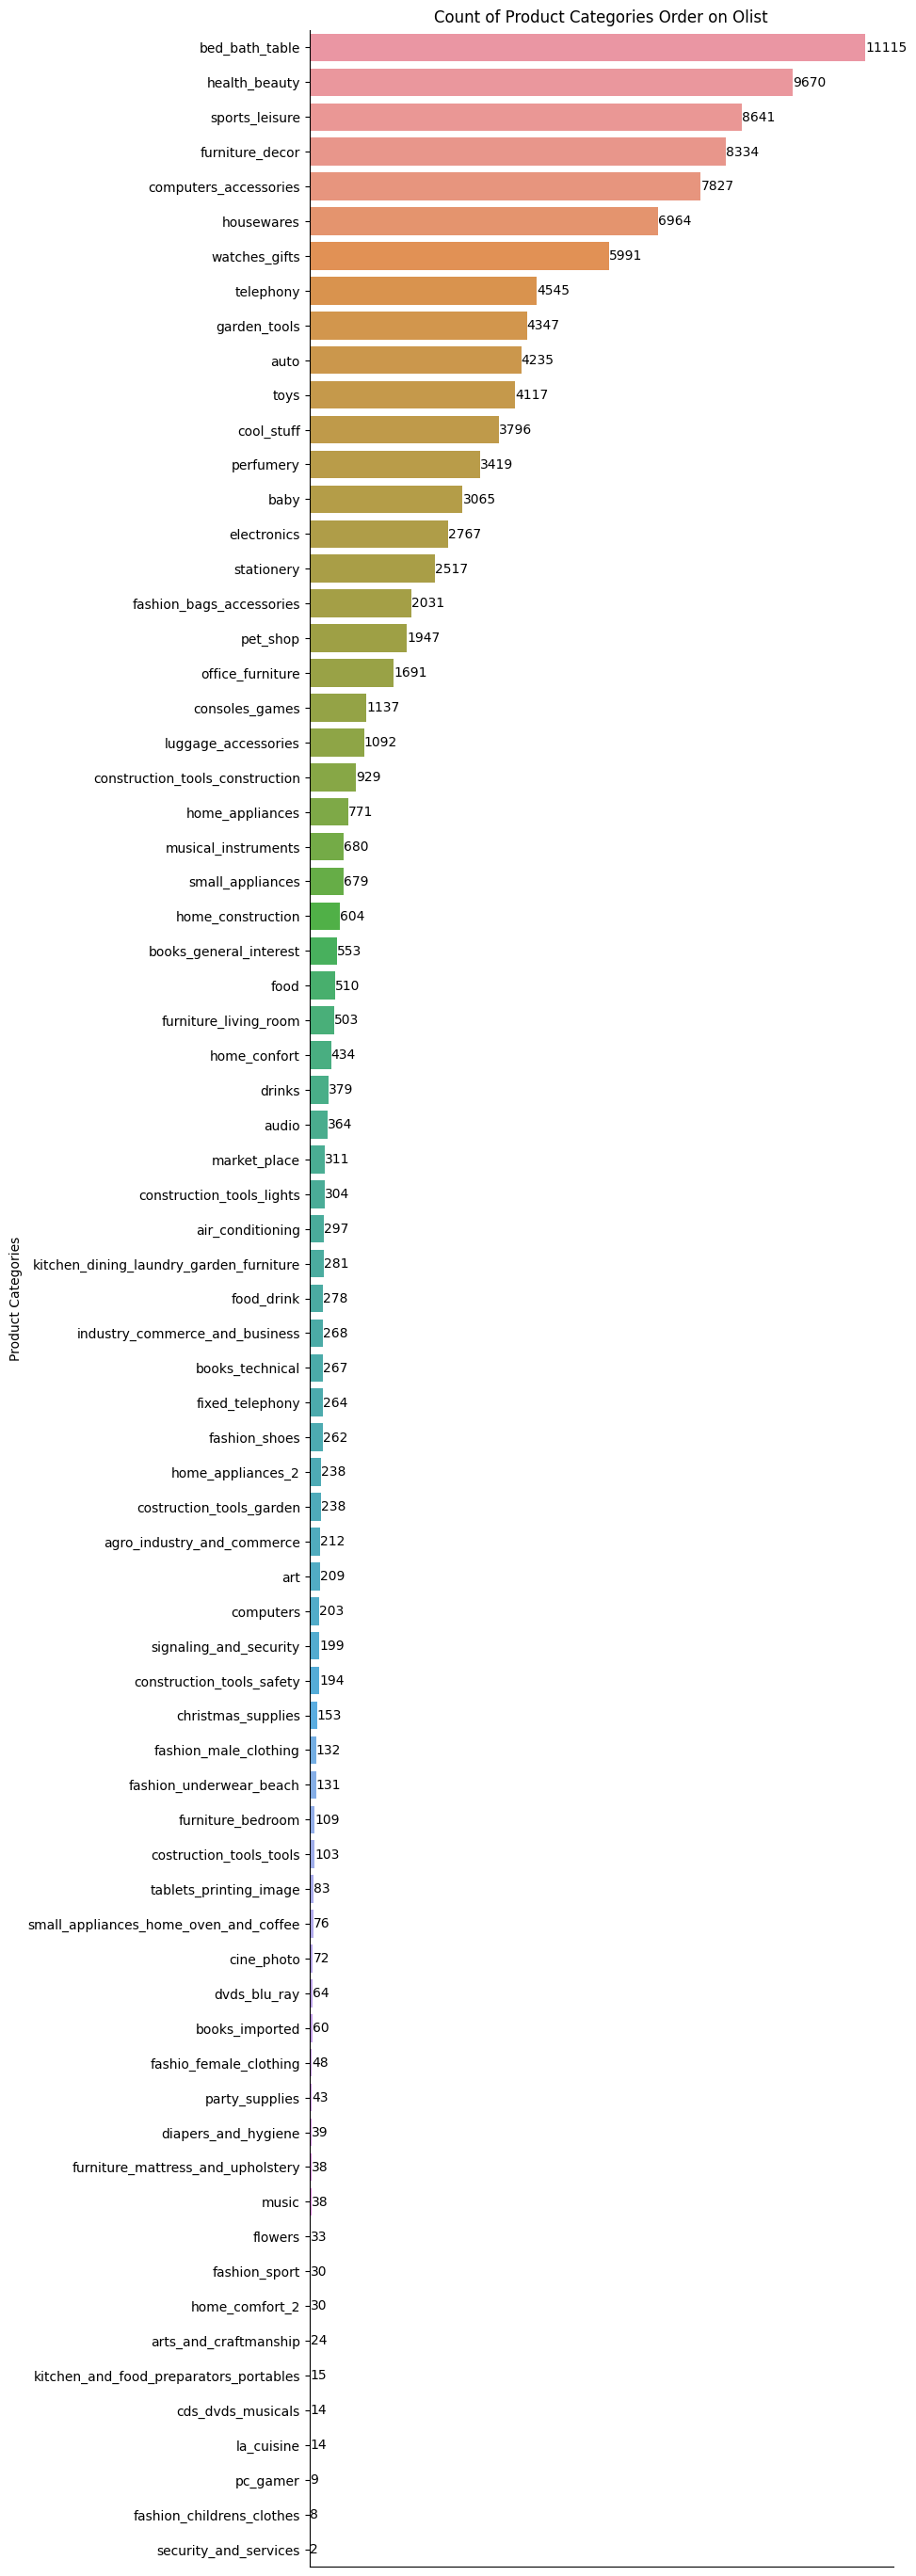

In [22]:
# Create a horizontal bar plot using the 'grouped' data
# Display product categories on the y-axis and order IDs on the x-axis
# Order the bars based on the descending order of order IDs

fig, ax = plt.subplots(figsize=(8, 35))

ax = sns.barplot(data=grouped, y='product_category_name_english', x='order_id',
                 orient='h',
                 order=grouped.sort_values('order_id', ascending=False).product_category_name_english)

for i in ax.containers:
    ax.bar_label(i,)

sns.despine()
ax.set(title='Count of Product Categories Order on Olist')
ax.set(xlabel=None)
ax.set(xticks=[])
ax.set(ylabel='Product Categories')

bed_bath_table category is sold more than other category.

#2. The company wants to know the trend of product sales from the most ordered product categories in the previous objective

In [23]:
# Filter rows from the 'merge_table' dataframe where the product category is 'bed_bath_table'
bed_bath_table_order = merge_table[merge_table.product_category_name_english == 'bed_bath_table']

# Extract the year from the 'order_purchase_timestamp' column
# and assign it to a new column 'order_purchase_timestamp_year'
bed_bath_table_order['order_purchase_timestamp_year'] = bed_bath_table_order['order_purchase_timestamp'].dt.year
bed_bath_table_order

<ipython-input-23-c4415a565631>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_bath_table_order['order_purchase_timestamp_year'] = bed_bath_table_order['order_purchase_timestamp'].dt.year


,order_id,product_id,seller_id,shipping_limit_date,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year
12,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,bed_bath_table,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,2018
20,000e63d38ae8c00bbcb5a30573b99628,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,2018-03-29 20:07:49,bed_bath_table,98884e672c5ba85f4394f2044e1a3eab,delivered,2018-03-23 19:48:26,2018-03-23 20:07:49,2018-03-26 21:38:48,2018-03-27 14:51:47,2018-04-05,2018
37,00169e31ef4b29deaae414f9a5e95929,b10eba910a974df70b8a12d0665cdb9e,a3e9a2c700480d9bb01fba070ba80a0e,2018-01-23 03:35:47,bed_bath_table,efb3830adb68fb8a89c948774388ec28,delivered,2018-01-16 09:26:39,2018-01-17 03:35:47,2018-01-17 16:46:04,2018-01-23 20:19:04,2018-02-07,2018
47,001c85b5f68d2be0cb0797afc9e8ce9a,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,bed_bath_table,48ed31e735f1c420ed6ca3637b7c744d,delivered,2017-11-24 19:19:18,2017-11-24 22:38:47,2017-11-27 12:42:15,2017-12-22 18:37:40,2017-12-14,2017
51,001dbc16dc51075e987543d23a0507c7,777d2e438a1b645f3aec9bd57e92672c,4a3ca9315b744ce9f8e9374361493884,2017-02-01 13:17:57,bed_bath_table,698a74f33469466fa4172e829505d1c6,delivered,2017-01-28 13:17:57,2017-01-28 13:32:16,2017-02-01 15:59:46,2017-02-13 13:17:47,2017-03-20,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112587,ffdc79897a2df4181a299b803765f0cc,ec2d43cc59763ec91694573b31f1c29a,1c129092bf23f28a5930387c980c0dfc,2017-11-07 03:55:10,bed_bath_table,4f2c86a6f30d1c9c0d935814141e4f29,delivered,2017-10-28 08:23:18,2017-10-31 03:55:10,2017-11-03 16:27:00,2017-11-09 22:28:27,2017-11-23,2017
112600,ffe48cb3d8485e0cb0405e21192e592f,dd44ecaddb22d00c140856b180f5d9b4,54965bbe3e4f07ae045b90b0b8541f52,2018-07-11 18:30:38,bed_bath_table,c7d443bf742505394e4431d332fa5744,delivered,2018-06-29 18:11:54,2018-06-29 18:30:38,2018-07-02 14:06:00,2018-07-12 14:38:38,2018-08-01,2018
112627,fff2e9e3aa8644e19710216b4ef53ab2,7340a3839a1de1e99d149b8cf052a2ec,4a3ca9315b744ce9f8e9374361493884,2017-06-01 02:42:42,bed_bath_table,3aa733464591b63ba16abe084903a511,delivered,2017-05-25 17:22:57,2017-05-26 02:42:42,2017-05-26 16:12:47,2017-06-06 14:05:37,2017-06-19,2017
112639,fffb2ef8874127f75b52b643880fd7e0,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,bed_bath_table,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27,2018


In [24]:
# Group the 'bed_bath_table_order' dataframe by the year of order purchase
# Calculate the count of order IDs within each year and reset the index
grouped = bed_bath_table_order.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
grouped

,order_purchase_timestamp_year,order_id
0,2016,8
1,2017,5223
2,2018,5884


[Text(0, 0.5, 'Count of ordered')]

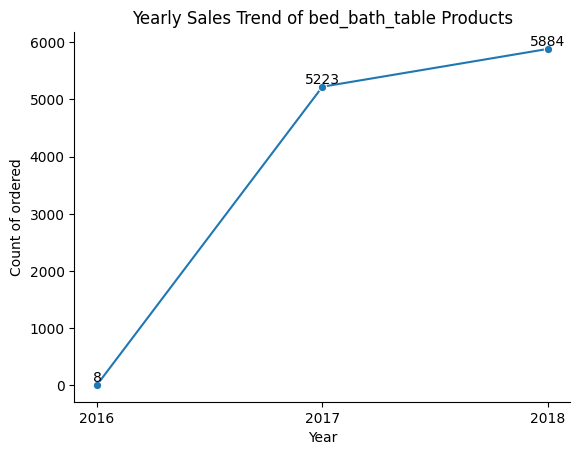

In [25]:
# Display the trend of order counts over years for the 'bed_bath_table' product category

ax = sns.lineplot(data=grouped, y='order_id', x='order_purchase_timestamp_year', marker='o')

for index, row in grouped.iterrows():
    plt.text(row['order_purchase_timestamp_year'], row['order_id'], str(row['order_id']),
             ha='center', va='bottom')

plt.xticks([2016, 2017, 2018])
sns.despine()
ax.set(title='Yearly Sales Trend of bed_bath_table Products')
ax.set(xlabel='Year')
ax.set(ylabel='Count of ordered')

Number of orders bed_bath_table categories is increase year over year.

#3. The company also wants to know the distribution of order status from year to year in the most ordered product categories in objective 1

In [26]:
# Group the 'bed_bath_table_order' dataframe by 'order_purchase_timestamp_year' and 'order_status' columns
# Calculate the count of order IDs for each combination and reset the index
grouped = bed_bath_table_order.groupby(['order_purchase_timestamp_year',
                                        'order_status'])['order_id'].count().reset_index()

# Pivot the 'grouped' dataframe to create a new dataframe where 'order_purchase_timestamp_year' is the index,
# 'order_status' becomes columns, and the values are the counts of order IDs
pivot = grouped.pivot(index='order_purchase_timestamp_year',
                      columns='order_status', values='order_id').reset_index()

# Fill any missing (NaN) values in the 'pivot' dataframe with 0
pivot = pivot.fillna(0)
pivot

order_status,order_purchase_timestamp_year,canceled,delivered,invoiced,processing,shipped
0,2016,0.0,8.0,0.0,0.0,0.0
1,2017,7.0,5135.0,10.0,8.0,63.0
2,2018,11.0,5810.0,7.0,0.0,56.0


There are several orders that have not been sent in 2017 and 2018.

##Let's dive into each year

###2016

####Delivered

There are 8 orders of bed_bath_table category with delivered status. No NaN values in each columns. Seems the transactions in 2016 are solved well.

In [27]:
# Filter rows from the 'bed_bath_table' dataframe where the year of purchase time is 2016'
delivered_order_2016 = bed_bath_table_order[bed_bath_table_order['order_purchase_timestamp_year']==2016]
delivered_order_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 6525 to 106499
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       8 non-null      object        
 1   product_id                     8 non-null      object        
 2   seller_id                      8 non-null      object        
 3   shipping_limit_date            8 non-null      datetime64[ns]
 4   product_category_name_english  8 non-null      object        
 5   customer_id                    8 non-null      object        
 6   order_status                   8 non-null      object        
 7   order_purchase_timestamp       8 non-null      datetime64[ns]
 8   order_approved_at              8 non-null      datetime64[ns]
 9   order_delivered_carrier_date   8 non-null      datetime64[ns]
 10  order_delivered_customer_date  8 non-null      datetime64[ns]
 11  order_estimated

###2017

####delivered

There are 5135 orders of bed_bath_table category on 2017 which has delivered status.

In [28]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is delivered and year of purchase time is 2017
delivered_order_2017 = bed_bath_table_order[(bed_bath_table_order['order_status']=='delivered')
                                            & (bed_bath_table_order['order_purchase_timestamp_year']==2017)]

delivered_order_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5135 entries, 47 to 112627
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       5135 non-null   object        
 1   product_id                     5135 non-null   object        
 2   seller_id                      5135 non-null   object        
 3   shipping_limit_date            5135 non-null   datetime64[ns]
 4   product_category_name_english  5135 non-null   object        
 5   customer_id                    5135 non-null   object        
 6   order_status                   5135 non-null   object        
 7   order_purchase_timestamp       5135 non-null   datetime64[ns]
 8   order_approved_at              5134 non-null   datetime64[ns]
 9   order_delivered_carrier_date   5135 non-null   datetime64[ns]
 10  order_delivered_customer_date  5135 non-null   datetime64[ns]
 11  order_estimate

order_approved_at has 1 NaN value which contain time of payments approval.

In [29]:
# select rows where 'order_approved_at' is missing (NaN)
delivered_order_2017_nan = delivered_order_2017.loc[delivered_order_2017['order_approved_at'].isna()]
delivered_order_2017_nan

,order_id,product_id,seller_id,shipping_limit_date,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year
26393,3c0b8706b065f9919d0505d3b3343881,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,bed_bath_table,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,2017


In [30]:
# Extract the order ID from the first row of the 'delivered_order_2017_nan' dataframe
nan_order_id = delivered_order_2017_nan.order_id.values[0]

# Construct an SQL query to select all columns from 'olist_order_payments_dataset'
# where the 'order_id' matches the extracted 'nan_order_id'
query = f""" SELECT *
            FROM olist_order_payments_dataset
            WHERE order_id = '{nan_order_id}'
        """
payments = pd.read_sql(query, con)

payments.drop(['index'], axis=1, inplace=True)
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,3c0b8706b065f9919d0505d3b3343881,1,boleto,1,157.19


The company could check order id '3c0b8706b065f9919d0505d3b3343881' to determine whether the boleto payment on this order has been paid or not.

####invoiced

Now, let's dive into bed_bath_table orders with invoiced status on 2017.

In [31]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is invoiced and year of purchase time is 2017'
invoiced_order_2017 = bed_bath_table_order[(bed_bath_table_order['order_status']=='invoiced')
                                            & (bed_bath_table_order['order_purchase_timestamp_year']==2017)]
invoiced_order_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7225 to 69616
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       10 non-null     object        
 1   product_id                     10 non-null     object        
 2   seller_id                      10 non-null     object        
 3   shipping_limit_date            10 non-null     datetime64[ns]
 4   product_category_name_english  10 non-null     object        
 5   customer_id                    10 non-null     object        
 6   order_status                   10 non-null     object        
 7   order_purchase_timestamp       10 non-null     datetime64[ns]
 8   order_approved_at              10 non-null     datetime64[ns]
 9   order_delivered_carrier_date   0 non-null      datetime64[ns]
 10  order_delivered_customer_date  0 non-null      datetime64[ns]
 11  order_estimated

From 10 orders, the order_delivered_carrier_date and order_delivered_customer_date columns are NaN. There is a possibility that the seller has not yet handled the orders to logistic partners, the logistic partner has not yet input the date of these orders received from the seller in logistic, or the logistic partner has not yet input the date of these orders sent to customers.

In [32]:
# Grouping the 'invoiced_order_2017' by 'seller_id', 'order_id', and 'product_id'.
# Then, counting the occurrences of each unique 'product_id' within each group
grouped_invoiced_order_2017 = invoiced_order_2017.groupby(['seller_id', 'order_id', 'product_id'])['product_id'].count()
grouped_invoiced_order_2017

seller_id                         order_id                          product_id                      
062ce95fa2ad4dfaedfc79260130565f  10605be2fc9784c0fd19b78f8b1924c0  cd82271424be9568801391194697361c    1
1a3df491d1c4f1589fc2b934ada68bf2  51b0dccc8596ce37a930dff2d63a10a2  bace90a7338e9d31371ad47811cf4c7d    1
4a3ca9315b744ce9f8e9374361493884  9ee84e2bfcbb0e4aa06217c6ecbab36e  99a4788cb24856965c36a24e339b6058    1
54965bbe3e4f07ae045b90b0b8541f52  41ad2ae32ee66c07ef3b0301ba02ad27  4dfbe01419f983d397ed0439f090541d    1
                                  81ad0542f902d06936247fe96fb102f8  8ce450d8a20c20e17ba1536a19f60d39    1
a673821011d0cec28146ea42f5ab767f  4acae38053fac34d667306b2de1445ee  4a0c2a56e65c941a0bb9874c47dd66d8    2
cfb1a033743668a192316f3c6d1d2671  6df49762e95869691b34a001e36b8297  06bfe79d999bcce96f9ebfc74280d1d7    2
                                  8aec3a066f732dd927ec8fef1752415b  0693bcecfea57f2ad547d1ff56c7d9ea    1
Name: product_id, dtype: int64

Here is the list of seller_id, order_id, and product_id that do not have a date of delivery to logistics or to customers. The company could check internal records, customer communications, and order management systems to ensure that the orders have indeed not been sent or for some other reason.

####processing

Let's do the same thing with data in 2017 which has processing status

In [33]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is processing and year of purchase time is 2017'
processing_order_2017 = bed_bath_table_order[(bed_bath_table_order['order_status']=='processing')
                                            & (bed_bath_table_order['order_purchase_timestamp_year']==2017)]
processing_order_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 9250 to 80561
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       8 non-null      object        
 1   product_id                     8 non-null      object        
 2   seller_id                      8 non-null      object        
 3   shipping_limit_date            8 non-null      datetime64[ns]
 4   product_category_name_english  8 non-null      object        
 5   customer_id                    8 non-null      object        
 6   order_status                   8 non-null      object        
 7   order_purchase_timestamp       8 non-null      datetime64[ns]
 8   order_approved_at              8 non-null      datetime64[ns]
 9   order_delivered_carrier_date   0 non-null      datetime64[ns]
 10  order_delivered_customer_date  0 non-null      datetime64[ns]
 11  order_estimated_

From 8 orders, the order_delivered_carrier_date and order_delivered_customer_date columns are NaN. There is a possibility that the sellers are not yet handled the orders to logistic partners or logistic partner is not yet input the date of these orders.here is a possibility that the seller has not yet handled the orders to logistic partners, the logistic partner has not yet input the date of these orders received from the seller in logistic, or the logistic partner has not yet input the date of these orders sent to customers.

In [34]:
# Grouping the 'processing_order_2017' by 'seller_id', 'order_id', and 'product_id'
# Then, counting the number of occurrences of each unique 'product_id' within each group
grouped_processing_order_2017 = processing_order_2017.groupby(['seller_id',
                                                               'order_id',
                                                               'product_id'])['product_id'].count()
grouped_processing_order_2017

seller_id                         order_id                          product_id                      
41b39e28db005d9731d9d485a83b4c38  191abde9c3bf77d1ce67d100d8db6d15  b808914cdb615d812fd24aab699cf952    1
                                  a71500bad3f392b20ef73778b135379a  2273be0f0b60b5d12c8853cae6ccf7ef    1
530ec6109d11eaaf87999465c6afee01  34d3825176b5e4ae141843ed4e313c7d  54668f8d7fb456c8977d5ca817dab50c    1
602044f2c16190c2c6e45eb35c2e21cb  265271dd979e1221bab55d039af24b37  693e8a3550dfe12cd2a3f2a3f01b6130    1
67e43d802fde8cfd3f9580124f8167d1  b741ced31205b787eebdd0cc7f220b0a  4396a21dbcffe535748c5df0f544b5de    2
ace601496e211a664100321f038f50af  8505d7267ce3f58c129ffa8468cebf21  9881e1d8024c8459494c134d29a42cd8    1
b45d7ebfb7378630f1bcd74b6ff86ff7  152c2472d13abe1c989b66d0a8c2dac9  44907e5763ed2255fff21e4fb12a635a    1
Name: product_id, dtype: int64

Here the list of seller_id, order_id, and product_id that do not have date of deliveried to carrier or to customers. Like orders with invoiced status in 2017, the company could check internal records, customer communications, and order management systems to ensure that the orders have indeed not been sent or for some other reason.

####shipped

Next, we will explore the order with shipped status in 2017.

In [35]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status shipped and year of purchase time is 2017'
shipped_order_2017 = bed_bath_table_order[(bed_bath_table_order['order_status']=='shipped')
                                          & (bed_bath_table_order['order_purchase_timestamp_year']==2017)]
shipped_order_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1263 to 112102
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       63 non-null     object        
 1   product_id                     63 non-null     object        
 2   seller_id                      63 non-null     object        
 3   shipping_limit_date            63 non-null     datetime64[ns]
 4   product_category_name_english  63 non-null     object        
 5   customer_id                    63 non-null     object        
 6   order_status                   63 non-null     object        
 7   order_purchase_timestamp       63 non-null     datetime64[ns]
 8   order_approved_at              63 non-null     datetime64[ns]
 9   order_delivered_carrier_date   63 non-null     datetime64[ns]
 10  order_delivered_customer_date  0 non-null      datetime64[ns]
 11  order_estimate

From 63 orders, the order_delivered_customer_date is NaN. There is a possibility that the order has not reached the buyer or the shipping expedition did not input the date the item arrived at the customer

In [36]:
# Grouping the 'shipped_order_2017' by'customer_id', 'order_id', and 'product_id'.
# Then, counting the occurrences of each unique 'order_id' within each group.
shipped_order_2017.groupby(['customer_id', 'order_id', 'product_id'])['order_id'].count()

customer_id                       order_id                          product_id                      
0026d252429f669d454d726e5e956aa1  1839b1db32d5ea90a7fc3ca19bdd16ad  dc3665bc3584a881a2462a1efbc71107    1
069a724b11ade79937f258ebc58c74ef  9ddf4a39b3954edb7d4d84471f3229ea  b30bd2570ba0ad3ce06e785a7b23d544    1
10b7134ae8b326cdb2d42aedd3093bc7  4483bebac87f089540f2e5be0a6589f6  99a4788cb24856965c36a24e339b6058    1
10bf225850ad702ff45fb5f9016bd1bd  843be4a0dcdb9716de7652d53af4acab  952670bc019a73f0933157ec82ff6e4f    1
11bb175d41bc7f2eb361e6ab7542d61e  bcfd112593a122ae1272e80681e2ac72  d4fe034cde911805af12724d73fde7e0    1
12e501af448478b1e785e738b6232f5c  8d38f0c621183c4e95c8c65aba625120  ac800affc1cff06ce347292284498993    1
1622f2d9b3f7674f53e69d66f98e3517  125065dcda5fb5549b43a1ce085bec63  2a2d22ae30e026f1893083c8405ca522    1
1636ea836eb8309398c3a98f0fcf4951  6762c128b601a5d3cf6c51958ecec54f  99a4788cb24856965c36a24e339b6058    1
17497fd62d5b93c7d1b720271f313439  acf6090782590f9b5

Here the list of customer_id, order_id, and product_id that do not have date of deliveried to customers. The company could contact the expedition service, verify the delivery date, and check delivery proof. Furthermore, the company can also verify the customer to ensure the product has reached the buyer.

###2018

####delivered

There are 5810 orders of bed_bath_table category on 2018 which has delivered status. No NaN values in each columns. Seems the delivered orders in 2018 are solved well.

In [37]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is delivered and year of purchase time is 2018'
delivered_order_2018 = bed_bath_table_order[(bed_bath_table_order['order_status']=='delivered')
                                            & (bed_bath_table_order['order_purchase_timestamp_year']==2018)]
delivered_order_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5810 entries, 12 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       5810 non-null   object        
 1   product_id                     5810 non-null   object        
 2   seller_id                      5810 non-null   object        
 3   shipping_limit_date            5810 non-null   datetime64[ns]
 4   product_category_name_english  5810 non-null   object        
 5   customer_id                    5810 non-null   object        
 6   order_status                   5810 non-null   object        
 7   order_purchase_timestamp       5810 non-null   datetime64[ns]
 8   order_approved_at              5810 non-null   datetime64[ns]
 9   order_delivered_carrier_date   5810 non-null   datetime64[ns]
 10  order_delivered_customer_date  5810 non-null   datetime64[ns]
 11  order_estimate

####invoiced

Let's check the orders with invoiced status

In [38]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is invoiced and year of purchase time is 2018'
invoiced_order_2018 = bed_bath_table_order[(bed_bath_table_order['order_status']=='invoiced')
                                          & (bed_bath_table_order['order_purchase_timestamp_year']==2018)]
invoiced_order_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 12840 to 104632
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       7 non-null      object        
 1   product_id                     7 non-null      object        
 2   seller_id                      7 non-null      object        
 3   shipping_limit_date            7 non-null      datetime64[ns]
 4   product_category_name_english  7 non-null      object        
 5   customer_id                    7 non-null      object        
 6   order_status                   7 non-null      object        
 7   order_purchase_timestamp       7 non-null      datetime64[ns]
 8   order_approved_at              7 non-null      datetime64[ns]
 9   order_delivered_carrier_date   0 non-null      datetime64[ns]
 10  order_delivered_customer_date  0 non-null      datetime64[ns]
 11  order_estimate

From 7 orders, the order_delivered_carrier_date and order_delivered_customer_date columns are NaN. There is a possibility that the seller has not yet handled the orders to logistic partners, the logistic partner has not yet input the date of these orders received from the seller in logistic, or the logistic partner has not yet input the date of these orders sent to customers.

In [39]:
# Grouping the 'invoiced_order_2018' by 'seller_id', 'order_id', and 'product_id'.
# Then, counting the occurrences of each unique 'product_id' within each group.
invoiced_order_2018.groupby(['seller_id', 'order_id', 'product_id'])['product_id'].count()

seller_id                         order_id                          product_id                      
1835b56ce799e6a4dc4eddc053f04066  81b6015857004cedcfbc04ae95d7bfe5  328de56b9fe359835173118dee79a12a    1
                                                                    7c1af6529d6dc15a19b722e39f20db2a    1
1900267e848ceeba8fa32d80c1a5f5a8  edafb5849135e41d30dcb51fbaa78014  9a7c0784b8058269d176b3089c946ed0    1
259f7b5e6e482c230e5bfaa670b6bb8f  500f1d7b6148a81d7178121caf651e3d  289dfe89bc0d1eb6bea5a0a3bde85552    1
2eb70248d66e0e3ef83659f71b244378  64c4f910545582c5d0fa5bed30292b4c  fcdb929c70287379ce31deed3f733d72    1
d2374cbcbb3ca4ab1086534108cc3ab7  2da6df6ecc3f69f3642ce1fafad85d5a  f89caa3ea4fb5f7b6e7fb2bb4ba61881    1
e6ffc9ac6a7adc9d16a1cfc2286dd546  1d211ed3ac0f4b3a52d4fb038f02da04  65d347978d3b5418fd6db2a855f73258    1
Name: product_id, dtype: int64

Here is the list of seller_id, order_id, and product_id that do not have a date of delivery to logistics or to customers. The company could check internal records, customer communications, and order management systems to ensure that the orders have indeed not been sent or for some other reason.

####shipped

Let's explore the order with shipped status in 2018.

In [40]:
# Filter rows from the 'bed_bath_table_order' dataframe
# where the order status is shipped and year of purchase time is 2018
shipped_order_2018 = bed_bath_table_order[(bed_bath_table_order['order_status']=='shipped')
                                          & (bed_bath_table_order['order_purchase_timestamp_year']==2018)]
shipped_order_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 79 to 111999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       56 non-null     object        
 1   product_id                     56 non-null     object        
 2   seller_id                      56 non-null     object        
 3   shipping_limit_date            56 non-null     datetime64[ns]
 4   product_category_name_english  56 non-null     object        
 5   customer_id                    56 non-null     object        
 6   order_status                   56 non-null     object        
 7   order_purchase_timestamp       56 non-null     datetime64[ns]
 8   order_approved_at              56 non-null     datetime64[ns]
 9   order_delivered_carrier_date   56 non-null     datetime64[ns]
 10  order_delivered_customer_date  0 non-null      datetime64[ns]
 11  order_estimated_

From 56 orders, the order_delivered_customer_date is NaN. There is a possibility that the order has not reached the buyer or the shipping expedition did not input the date the item arrived at the customer.

In [41]:
# Grouping the 'shipped_order_2017' by 'customer_id', 'order_id', and 'product_id'.
# Then, counting the occurrences of each unique 'order_id' within each group.
shipped_order_2017.groupby(['customer_id', 'order_id', 'product_id'])['order_id'].count()

customer_id                       order_id                          product_id                      
0026d252429f669d454d726e5e956aa1  1839b1db32d5ea90a7fc3ca19bdd16ad  dc3665bc3584a881a2462a1efbc71107    1
069a724b11ade79937f258ebc58c74ef  9ddf4a39b3954edb7d4d84471f3229ea  b30bd2570ba0ad3ce06e785a7b23d544    1
10b7134ae8b326cdb2d42aedd3093bc7  4483bebac87f089540f2e5be0a6589f6  99a4788cb24856965c36a24e339b6058    1
10bf225850ad702ff45fb5f9016bd1bd  843be4a0dcdb9716de7652d53af4acab  952670bc019a73f0933157ec82ff6e4f    1
11bb175d41bc7f2eb361e6ab7542d61e  bcfd112593a122ae1272e80681e2ac72  d4fe034cde911805af12724d73fde7e0    1
12e501af448478b1e785e738b6232f5c  8d38f0c621183c4e95c8c65aba625120  ac800affc1cff06ce347292284498993    1
1622f2d9b3f7674f53e69d66f98e3517  125065dcda5fb5549b43a1ce085bec63  2a2d22ae30e026f1893083c8405ca522    1
1636ea836eb8309398c3a98f0fcf4951  6762c128b601a5d3cf6c51958ecec54f  99a4788cb24856965c36a24e339b6058    1
17497fd62d5b93c7d1b720271f313439  acf6090782590f9b5

Here is the list of customer_id_id, order_id, and product_id that do not have a date of delivery to customers. The company could contact the expedition service, verify the delivery date, and check the delivery proof. Furthermore, the company can also verify the customer to ensure the product has reached the buyer.

based on the exploration of each status every year, we can see that there are several transactions that have not been resolved properly, such as still being invoiced, processed, or shipped even though it has been more than a year. The company could check the latest internal data or update it by asking the seller, courier, or customer.

We do not explore the orders with canceled status, because there are several factors a customer cancels an order, such as failing to make a payment, the item has not been processed, finding similar items at a lower price, wanting to change the order, etc. Because of these many factors, it would be better if the company provided a form for the reason why the customer canceled the order during the cancellation process. This form can contain a choice of reasons the customer canceled the order so that it will be easier for analysis in the future.

#4. Since there are several orders that have entered the expedition but the date received by the customer is still empty in 2017 and 2018, the company wants to know whether delays in shipping for this product category occur in certain locations?

In [42]:
# merge shipped order on 2017 and 2018
shipped_order_2017_2018 = pd.concat([shipped_order_2017, shipped_order_2018], ignore_index=True)
shipped_order_2017_2018

,order_id,product_id,seller_id,shipping_limit_date,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year
0,02ec4da9d03014f06d711d60eb37cc22,a87567bdce60de6f901e3d7c6d8df820,318f287a62ab7ac10b703ac37435a231,2017-05-05 13:05:49,bed_bath_table,79e6d859cf83e9bf76a07629ca91a49c,shipped,2017-04-28 12:32:56,2017-04-28 13:05:49,2017-05-11 11:12:57,NaT,2017-05-24,2017
1,03f3b08f9da8df7604b68b2fd5999e9a,68bf2e76db1d8e846042e54da87399ca,1a3df491d1c4f1589fc2b934ada68bf2,2017-10-04 20:56:20,bed_bath_table,a7bae4e3c00ecd65443abee9eacf6614,shipped,2017-09-26 20:42:08,2017-09-26 20:56:20,2017-09-28 14:36:01,NaT,2017-10-24,2017
2,0d760576500ea8611379a97ddcebf3db,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-09-25 03:37:38,bed_bath_table,f7f4c88bd5093db7e3fc7baad3cd8deb,shipped,2017-09-16 12:30:24,2017-09-19 03:44:09,2017-09-20 16:09:20,NaT,2017-10-04,2017
3,125065dcda5fb5549b43a1ce085bec63,2a2d22ae30e026f1893083c8405ca522,1a3df491d1c4f1589fc2b934ada68bf2,2017-07-28 17:10:09,bed_bath_table,1622f2d9b3f7674f53e69d66f98e3517,shipped,2017-07-20 16:57:21,2017-07-20 17:10:09,2017-07-24 10:10:01,NaT,2017-08-15,2017
4,1839b1db32d5ea90a7fc3ca19bdd16ad,dc3665bc3584a881a2462a1efbc71107,cca3071e3e9bb7d12640c9fbe2301306,2017-11-17 20:50:37,bed_bath_table,0026d252429f669d454d726e5e956aa1,shipped,2017-11-09 16:08:41,2017-11-10 20:50:37,2017-11-16 15:18:31,NaT,2017-11-29,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,f2d45d510df2224a3cac856602af7486,116a034e82f0914338091260ec0fc668,951e8cef368f09bb3f3d03c00ca4702c,2018-08-19 21:04:21,bed_bath_table,016199ad9f839e5d3e578fbdeb6f227b,shipped,2018-08-13 20:48:30,2018-08-13 21:04:21,2018-08-17 13:30:00,NaT,2018-08-27,2018
115,f72527ae8967d32220ad8610c273e100,06edb72f1e0c64b14c5b79353f7abea3,391fc6631aebcf3004804e51b40bcf1e,2018-03-16 02:31:37,bed_bath_table,2c2275bbf957f5844aa13dd15227d6e2,shipped,2018-03-05 11:05:52,2018-03-07 02:35:40,2018-03-08 12:11:55,NaT,2018-04-02,2018
116,f80a2d6485e38a437fca857efb7b1b66,02fbee632a2044d48ab16d57eec4db58,4a3ca9315b744ce9f8e9374361493884,2018-04-19 12:30:55,bed_bath_table,3f1b54aa1bd161f6840b4bf436b47588,shipped,2018-04-11 23:05:04,2018-04-13 12:34:39,2018-04-16 23:35:34,NaT,2018-05-21,2018
117,f80a2d6485e38a437fca857efb7b1b66,02fbee632a2044d48ab16d57eec4db58,4a3ca9315b744ce9f8e9374361493884,2018-04-19 12:30:55,bed_bath_table,3f1b54aa1bd161f6840b4bf436b47588,shipped,2018-04-11 23:05:04,2018-04-13 12:34:39,2018-04-16 23:35:34,NaT,2018-05-21,2018


In [43]:
# join with data from customers table
merge_data = pd.merge(shipped_order_2017_2018, customers, on='customer_id', how='inner')

# join with data from sellers table
merge_data = pd.merge(merge_data, sellers, on='seller_id', how='inner')

filtered_merge_data = merge_data[['order_id', 'product_id', 'customer_city',
                                  'seller_city', 'customer_state', 'seller_state']]

filtered_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        119 non-null    object
 1   product_id      119 non-null    object
 2   customer_city   119 non-null    object
 3   seller_city     119 non-null    object
 4   customer_state  119 non-null    object
 5   seller_state    119 non-null    object
dtypes: object(6)
memory usage: 6.5+ KB


No NaN values after join process.

In [44]:
filtered_merge_data

,order_id,product_id,customer_city,seller_city,customer_state,seller_state
0,02ec4da9d03014f06d711d60eb37cc22,a87567bdce60de6f901e3d7c6d8df820,belo horizonte,sao paulo,MG,SP
1,03f3b08f9da8df7604b68b2fd5999e9a,68bf2e76db1d8e846042e54da87399ca,sao paulo,joinville,SP,SC
2,125065dcda5fb5549b43a1ce085bec63,2a2d22ae30e026f1893083c8405ca522,jacarei,joinville,SP,SC
3,6e089ddde2c178b6b61fcdda22c9e84e,2a2d22ae30e026f1893083c8405ca522,itambe,joinville,PE,SC
4,7c259a397799aa0b7043c30ff9d042a5,2a2d22ae30e026f1893083c8405ca522,porto feliz,joinville,SP,SC
...,...,...,...,...,...,...
114,d1b7637acd3a7a42101faf9066e7309c,06edb72f1e0c64b14c5b79353f7abea3,sao paulo,ibitinga,SP,SP
115,d1b7637acd3a7a42101faf9066e7309c,06edb72f1e0c64b14c5b79353f7abea3,sao paulo,ibitinga,SP,SP
116,f72527ae8967d32220ad8610c273e100,06edb72f1e0c64b14c5b79353f7abea3,cachoeiras de macacu,ibitinga,RJ,SP
117,eda3cb37479a52de9848bfba4b805cdf,9a1497459e5fa13235a83d67111a8e7b,brasilia,ibitinga,DF,SP


Next, we will see that orders where the delivery_date is still empty are inter-city or inter-country shipments. For that, we will create a new column to check the similarity of countries or cities between sellers and buyers.

In [45]:
# Adding a new column 'same_city' to the DataFrame to check if the seller's city matches the customer's city
filtered_merge_data['same_city'] = filtered_merge_data['seller_city'] == filtered_merge_data['customer_city']

# Adding another new column 'same_state' to the DataFrame to check if the seller's state matches the customer's state
filtered_merge_data['same_state'] = filtered_merge_data['seller_state'] == filtered_merge_data['customer_state']
filtered_merge_data

<ipython-input-45-afe22ade970a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merge_data['same_city'] = filtered_merge_data['seller_city'] == filtered_merge_data['customer_city']
<ipython-input-45-afe22ade970a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merge_data['same_state'] = filtered_merge_data['seller_state'] == filtered_merge_data['customer_state']


,order_id,product_id,customer_city,seller_city,customer_state,seller_state,same_city,same_state
0,02ec4da9d03014f06d711d60eb37cc22,a87567bdce60de6f901e3d7c6d8df820,belo horizonte,sao paulo,MG,SP,False,False
1,03f3b08f9da8df7604b68b2fd5999e9a,68bf2e76db1d8e846042e54da87399ca,sao paulo,joinville,SP,SC,False,False
2,125065dcda5fb5549b43a1ce085bec63,2a2d22ae30e026f1893083c8405ca522,jacarei,joinville,SP,SC,False,False
3,6e089ddde2c178b6b61fcdda22c9e84e,2a2d22ae30e026f1893083c8405ca522,itambe,joinville,PE,SC,False,False
4,7c259a397799aa0b7043c30ff9d042a5,2a2d22ae30e026f1893083c8405ca522,porto feliz,joinville,SP,SC,False,False
...,...,...,...,...,...,...,...,...
114,d1b7637acd3a7a42101faf9066e7309c,06edb72f1e0c64b14c5b79353f7abea3,sao paulo,ibitinga,SP,SP,False,True
115,d1b7637acd3a7a42101faf9066e7309c,06edb72f1e0c64b14c5b79353f7abea3,sao paulo,ibitinga,SP,SP,False,True
116,f72527ae8967d32220ad8610c273e100,06edb72f1e0c64b14c5b79353f7abea3,cachoeiras de macacu,ibitinga,RJ,SP,False,False
117,eda3cb37479a52de9848bfba4b805cdf,9a1497459e5fa13235a83d67111a8e7b,brasilia,ibitinga,DF,SP,False,False


## Is the seller and customers from the same state

[Text(0, 0.5, 'Count of shipped orders')]

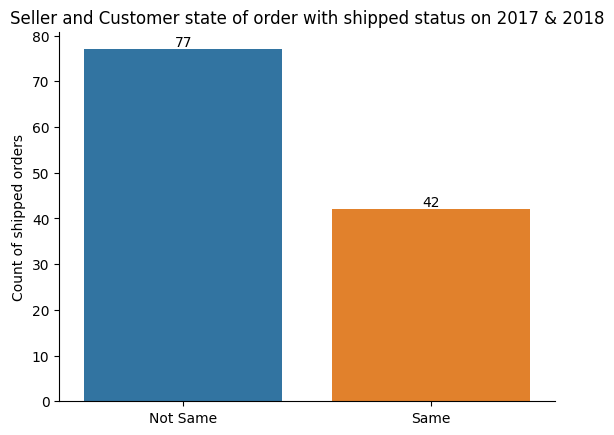

In [46]:
# Calculate the counts of 'True' and 'False' values in the 'same_state' column
same_state_counts = filtered_merge_data['same_state'].value_counts()

# Create a bar plot where x-axis represents the index (True or False) of
#same_state_counts and y-axis represents the count values.
ax = sns.barplot(x=same_state_counts.index, y=same_state_counts.values)

# Add labels displaying the count values on top of the bars
for i in ax.containers:
    ax.bar_label(i,)

sns.despine()
ax.set(title='Seller and Customer state of order with shipped status on 2017 & 2018')
ax.set(xlabel=None)
ax.set_xticklabels(['Not Same', 'Same'])
ax.set(ylabel='Count of shipped orders')

## Different State

#### Customers

In [47]:
# Filter the DataFrame to select rows where 'same_state' is False
different_state_cust_sell = filtered_merge_data[filtered_merge_data.same_state == False]

# Group the data by customer state and city, then count the occurrences of each product_id within each group.
customers_state = (different_state_cust_sell.groupby(['customer_state', 'customer_city'])['product_id'].count().reset_index()).sort_values('product_id', ascending=False)

customers_state

,customer_state,customer_city,product_id
26,RJ,rio de janeiro,23
3,BA,salvador,5
34,SP,sao paulo,4
10,MG,belo horizonte,3
24,RJ,nova iguacu,3
5,DF,brasilia,3
8,GO,goiania,3
19,RJ,belford roxo,2
16,PR,curitiba,2
14,PE,gravata,2


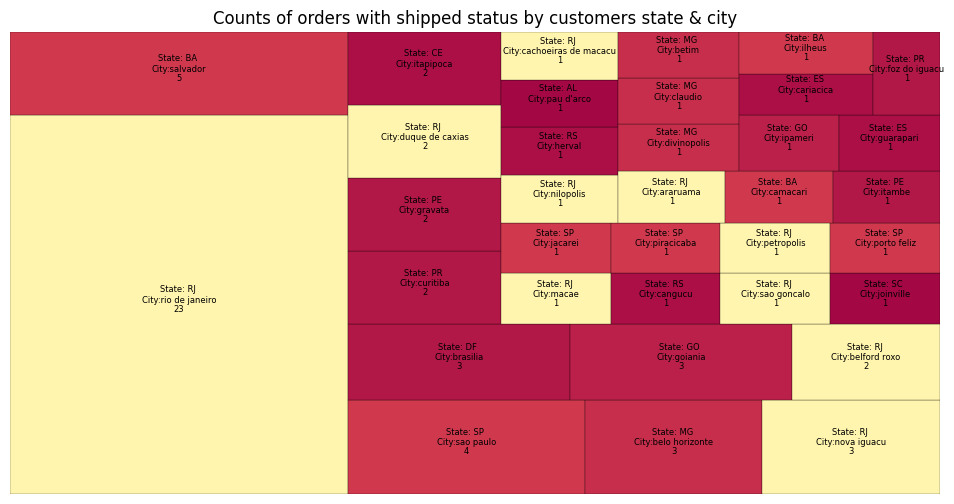

In [48]:
plt.figure(figsize=(12, 6))

# Calculate colors for each rectangle in the treemap based on the relative sum of product_ids per customer_state.
colors = plt.cm.Spectral(customers_state.groupby('customer_state')['product_id'].transform('sum') /
                         float(customers_state['product_id'].sum()))

squarify.plot(sizes=customers_state['product_id'],
              label=customers_state.apply(lambda row: f"State: {row['customer_state']} \nCity:{row['customer_city']}",
              axis=1),
              color=colors,
              alpha=1,
              text_kwargs={'fontsize': 6, 'wrap': True},
              value=customers_state['product_id'],
              edgecolor='black',
              linewidth=0.2)
plt.title('Counts of orders with shipped status by customers state & city')
plt.axis('off')
plt.show()


The orders with shipped status and not yet have delivered date mostly sent to state RJ especially to rio de janeiro city

####Sellers

In [49]:
# Group the data by seller state and city for cases where customers and sellers are from different states
sellers_state = (different_state_cust_sell.groupby(['seller_state', 'seller_city'])
                  ['product_id'].count().reset_index()).sort_values('product_id', ascending=False)
sellers_state

,seller_state,seller_city,product_id
8,SP,ibitinga,49
4,SC,joinville,6
13,SP,sao paulo,4
2,PR,foz do iguacu,3
10,SP,piracicaba,3
3,SC,brusque,2
9,SP,mogi das cruzes,2
11,SP,poa,2
0,MG,belo horizonte,1
1,MG,tres coracoes,1


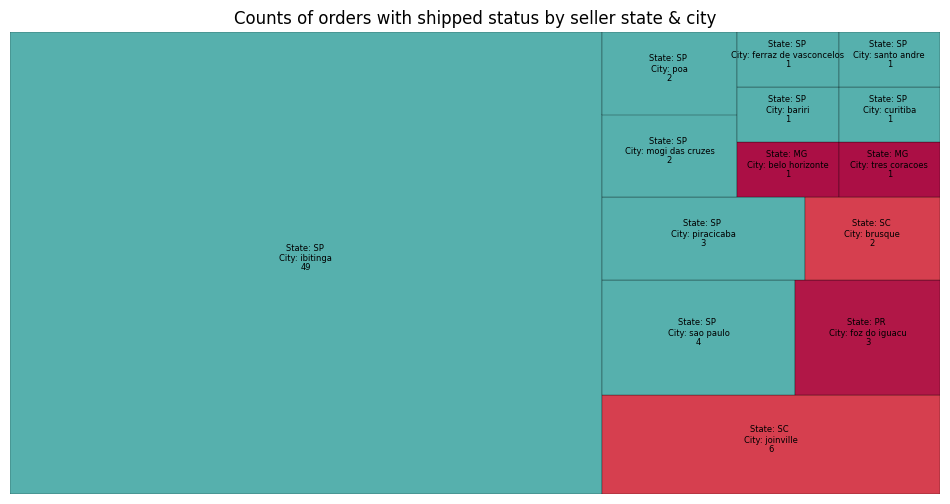

In [50]:
plt.figure(figsize=(12, 6))

# Calculate colors for each rectangle in the treemap based on
# the relative sum of product_ids per seller_state.
colors = plt.cm.Spectral(sellers_state.groupby('seller_state')['product_id'].transform('sum') / float(sellers_state['product_id'].sum()))

squarify.plot(sizes=sellers_state['product_id'],
              label=sellers_state.apply(lambda row: f"State: {row['seller_state']} \nCity: {row['seller_city']}",
              axis=1),
              color=colors,
              alpha=1,
              text_kwargs={'fontsize': 6, 'wrap': True},
              value=sellers_state['product_id'],
              edgecolor='black',
              linewidth=0.2)
plt.title('Counts of orders with shipped status by seller state & city')
plt.axis('off')
plt.show()


The orders with shipped status and not yet have delivered date mostly sent from SP state, especially from ibitinga city

## Same state

In [51]:
# Filter to select rows where 'same_state' is True, indicating the same state for customers and sellers
same_state_cust_sell = filtered_merge_data[filtered_merge_data.same_state == True]
same_state_cust_sell

,order_id,product_id,customer_city,seller_city,customer_state,seller_state,same_city,same_state
7,0d760576500ea8611379a97ddcebf3db,99a4788cb24856965c36a24e339b6058,taboao da serra,ibitinga,SP,SP,False,True
8,22ca2c0914d6a325764b5d09f54c1c00,be8aef10cd8c8a52fa98f5f7f71bb373,sao bernardo do campo,ibitinga,SP,SP,False,True
11,4b8a2d2dde058d83b31fa4f3d9ed88d8,777d2e438a1b645f3aec9bd57e92672c,santos,ibitinga,SP,SP,False,True
14,5933483834803a0e8e9fcd26cdb3774d,d2fdf77a5b302a3adfb145131a217f2e,cajamar,ibitinga,SP,SP,False,True
18,686000ebfaca7883583f123c458a89b7,99a4788cb24856965c36a24e339b6058,santos,ibitinga,SP,SP,False,True
20,7c933084ae34df732cfb3b47968b1666,fe95eb948375116da759c8ef60295001,boituva,ibitinga,SP,SP,False,True
21,98069064f6eef0a9910742e89aefd0b5,99a4788cb24856965c36a24e339b6058,sorocaba,ibitinga,SP,SP,False,True
22,9ddf4a39b3954edb7d4d84471f3229ea,b30bd2570ba0ad3ce06e785a7b23d544,sao paulo,ibitinga,SP,SP,False,True
24,b7ee003a15e0771e300ba4fa565c1cde,99a4788cb24856965c36a24e339b6058,sao paulo,ibitinga,SP,SP,False,True
31,cb7911a7f5f016586dcdf66a52c1f096,84f456958365164420cfc80fbe4c7fab,sao paulo,ibitinga,SP,SP,False,True


In [52]:
# Group the data by seller city and customer city
sell_cust_city = (same_state_cust_sell.groupby(['seller_city', 'customer_city'])
                  ['product_id'].count().reset_index()).sort_values('product_id', ascending=False)
sell_cust_city

,seller_city,customer_city,product_id
13,ibitinga,sao paulo,11
11,ibitinga,sao bernardo do campo,3
9,ibitinga,ribeirao preto,3
14,ibitinga,sao sebastiao,2
5,ibitinga,diadema,2
16,ibitinga,taboao da serra,2
10,ibitinga,santos,2
1,ibitinga,bauru,2
21,sao paulo,sao paulo,1
20,sao paulo,praia grande,1


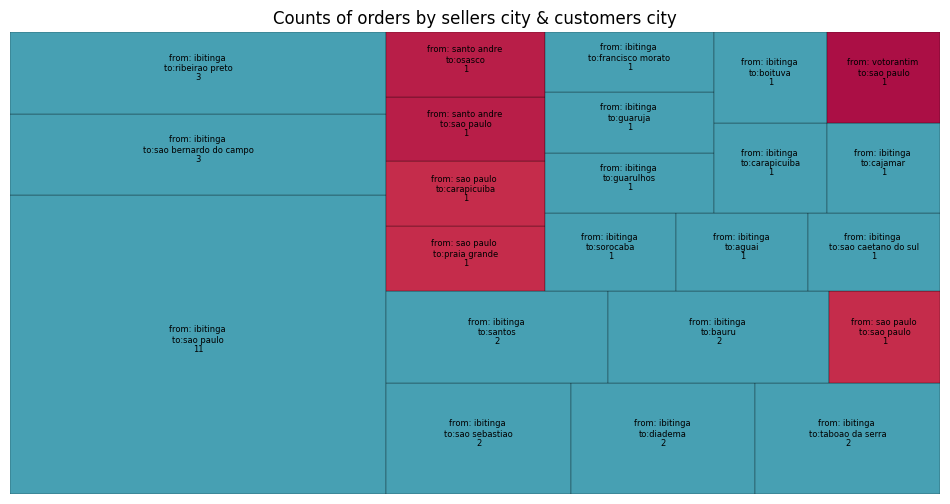

In [53]:
plt.figure(figsize=(12, 6))

# Calculate colors for each rectangle in the treemap based on
#the relative sum of product_ids per seller_city.
colors = plt.cm.Spectral(sell_cust_city.groupby('seller_city')['product_id'].transform('sum')
                          / float(sell_cust_city['product_id'].sum()))
squarify.plot(sizes=sell_cust_city['product_id'],
              label=sell_cust_city.apply(lambda row: f"from: {row['seller_city']} \nto:{row['customer_city']}",
              axis=1),
              color=colors,
              alpha=1,
              text_kwargs={'fontsize': 6, 'wrap': True},
              value=sell_cust_city['product_id'],
              edgecolor='black',
              linewidth=0.2)
plt.title('Counts of orders by sellers city & customers city')
plt.axis('off')
plt.show()


The orders with shipped status and not yet have delivered date mostly sent from itbinga and going to sao paulo

#Conclusion

From the exploration above, we get several informations:

* The "bed_bath_table" product category has been the top-selling product from 2016 to 2018.

* Sales trends for "bed_bath_table" products are increase year over year.

* Orders from 2016 were successfully fulfilled. However, some orders from 2017 and 2018 are still in the "invoiced", "shipped", and "processing" status. This suggests a possibility that these orders may not have reached the customers. Additionally, there is one "delivered" order from 2017 that does not have a payment date.

* Among the "bed_bath_table" category orders from 2017 and 2018 with a "shipped" status, cross-country shipments dominate the orders without a confirmed delivery date. Most of these orders are originating from Ibitinga city, SP state, heading to Rio De Janeiro city, RJ state. Orders with a "shipped" status lacking shipment dates within the same country are mostly from Ibitinga city to Sao Paulo city.

Based on the information obtained, there are several actions that the company can consider:

* Ensure that orders marked as "invoiced", "shipped", and "processing" in 2017 and 2018 have reached the customers or investigate the reasons for delays.

* Specifically, pay attention to the shipping issues (orders with "shipped" status) from Ibitinga to Rio De Janeiro. Improving the cross-country shipping process may be necessary, including checking for customs or logistics problems causing delays. It may also be beneficial to evaluate shipping policies, costs, and options to enhance efficiency and customer satisfaction.

* Confirm payments for the "delivered" order from 2017 that does not have a payment date. Ensure that the payment system is functioning properly and extend efforts to reach out to customers who haven't made payments.

* By taking these steps, the company can enhance its operations, address potential delivery and payment issues, and improve overall customer satisfaction.